# Linear Programming Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import linear_sum_assignment
import warnings

## Graphical Method

In [2]:
def plot_constraint(eq, color):
    x_values = np.linspace(0, 10, 100)
    y_values = (eq[2] - eq[0] * x_values) / eq[1]
    plt.plot(x_values, y_values, label=f'{eq[0]}x + {eq[1]}y <= {eq[2]}', color=color)

def plot_objective_function(obj_func, color):
    x_values = np.linspace(0, 10, 100)
    y_values = (obj_func[2] - obj_func[0] * x_values) / obj_func[1]
    plt.plot(x_values, y_values, label=f'{obj_func[0]}x + {obj_func[1]}y = {obj_func[2]}', linestyle='dashed', color=color)

def graphical_method(constraints, objective_function, problem_type):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)

        plt.figure(figsize=(8, 8))

        for i, constraint in enumerate(constraints):
            plot_constraint(constraint, color=f'C{i}')

        plot_objective_function(objective_function, color='black')

        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()

        x_values = np.linspace(0, 10, 100)
        for i, constraint in enumerate(constraints):
            y_values = (constraint[2] - constraint[0] * x_values) / constraint[1]
            if problem_type == 'min':
                plt.fill_between(x_values, 0, y_values, where=((constraint[0] * x_values) + constraint[1] * y_values) <= constraint[2], color=f'C{i}', alpha=0.3)
            elif problem_type == 'max':
                plt.fill_between(x_values, 0, y_values, where=((constraint[0] * x_values) + constraint[1] * y_values) >= constraint[2], color=f'C{i}', alpha=0.3)
                break

        c = objective_function[:2] if problem_type == 'min' else -np.array(objective_function[:2])
        res = linprog(c, A_ub=constraints[:, :2], b_ub=constraints[:, 2])

        print_results(res, problem_type)

        plt.show()

def print_results(result, problem_type):
    print("\n=== Results ===")
    if problem_type == 'min':
        print(f"Decision Variables (x, y): ({result.x[0]:.2f}, {result.x[1]:.2f})")
        print(f"Objective Value: {result.fun:.2f}")
    elif problem_type == 'max':
        print(f"Decision Variables (x, y): ({result.x[0]:.2f}, {result.x[1]:.2f})")
        print(f"Objective Value: {-result.fun:.2f}")

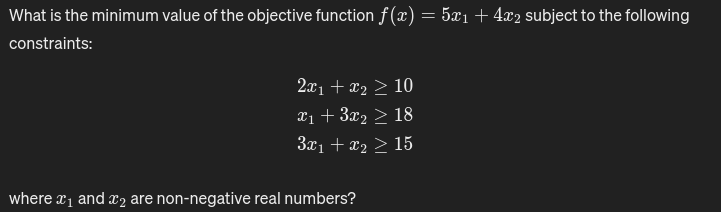


=== Results ===
Decision Variables (x, y): (0.00, 0.00)
Objective Value: 0.00


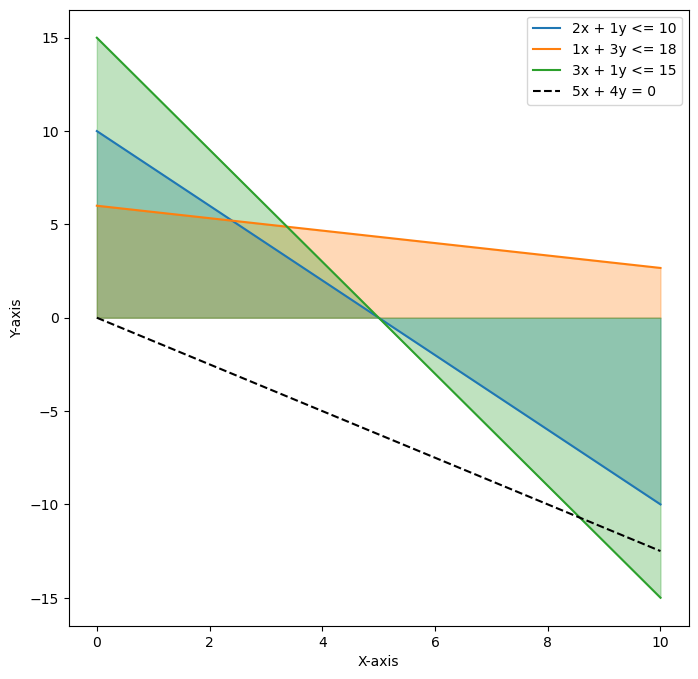

In [3]:
constraints_min = np.array([[2, 1, 10], [1, 3, 18], [3, 1, 15]])
objective_function_min = [5, 4, 0] 
graphical_method(constraints_min, objective_function_min, 'min')

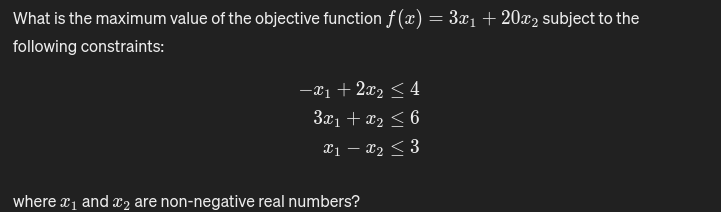


=== Results ===
Decision Variables (x, y): (1.14, 2.57)
Objective Value: 54.86


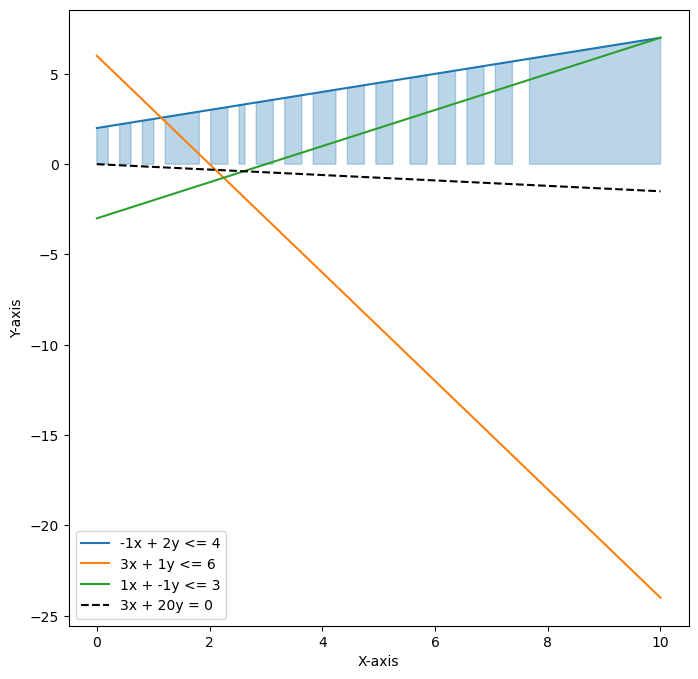

In [4]:
constraints_max = np.array([[-1, 2, 4], [3, 1, 6], [1, -1, 3]])
objective_function_max = [3, 20, 0]  
graphical_method(constraints_max, objective_function_max, 'max')

## Simplex Method

In [5]:
def simplex(c, A, b, maximize=True, plot_3d=False):
    def simplex_solver(c, A, b, maximize=True):
        if maximize:
            c = -c  # Convert maximization to minimization
        result = linprog(c, A_ub=A, b_ub=b)
        return result

    def simplex_print_solution(result):
        print("Decision Variables:", result.x)
        print("Objective Value:", -result.fun)  # Convert back to maximization if needed

    def plot_2d_solution(result, A, b):
        x = np.linspace(0, 10, 100)
        for i in range(len(b)):
            y = (b[i] - A[i, 0] * x) / A[i, 1]
            plt.plot(x, y, label=f'Constraint {i + 1}')

        plt.scatter(result.x[0], result.x[1], color='red', marker='o', label='Optimal Point')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Feasible Region and Optimal Point')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_3d_solution(result, A, b):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            x = np.linspace(0, 10, 100)
            y = np.linspace(0, 10, 100)
            X, Y = np.meshgrid(x, y)

            for i in range(len(b)):
                Z = (b[i] - A[i, 0] * X - A[i, 1] * Y) / A[i, 2]
                ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)

            ax.scatter(result.x[0], result.x[1], -result.fun, color='red', marker='o', label='Optimal Point')

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_title('Feasible Region and Optimal Point')
            plt.show()

    result = simplex_solver(c, A, b, maximize)

    if plot_3d:
        plot_3d_solution(result, A, b)
    else:
        plot_2d_solution(result, A, b)

    simplex_print_solution(result)

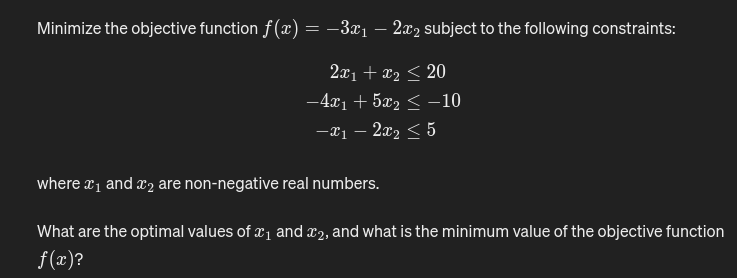

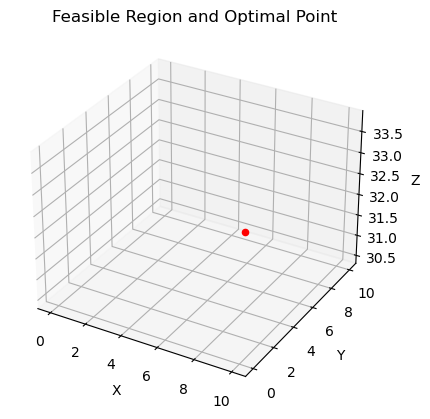

Decision Variables: [7.85714285 4.28571428 6.04761905]
Objective Value: 32.1428571323375


In [6]:
Objective_Function = np.array([-3, -2, 0])  
constraints = np.array([[2, 1, 0], [-4, 5, 0], [-1, -2, 0]]) 
RHS = np.array([20, -10, 5])  
simplex(Objective_Function, constraints, RHS, maximize = False, plot_3d = True)


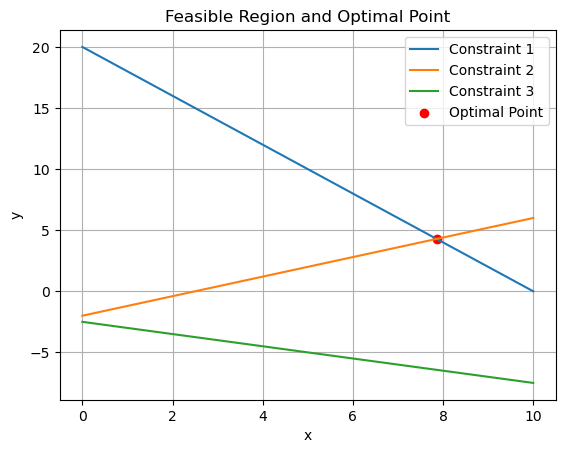

Decision Variables: [7.85714285 4.28571428 6.04761905]
Objective Value: 32.1428571323375


In [7]:
simplex(Objective_Function, constraints, RHS, maximize = False, plot_3d = False)

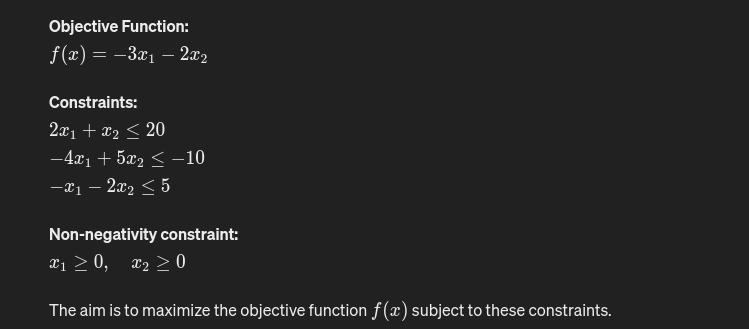

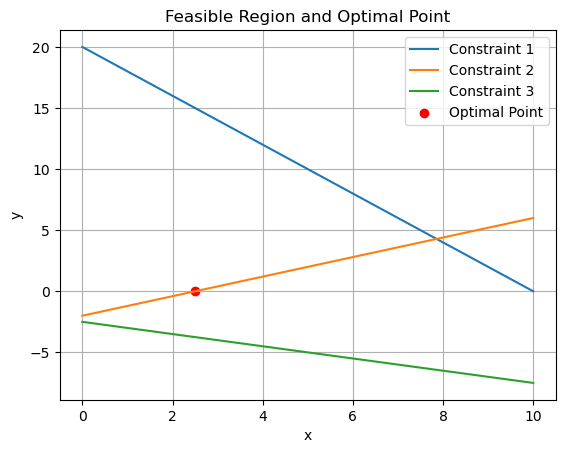

Decision Variables: [2.50000000e+00 4.92394014e-13 5.41666667e+00]
Objective Value: -7.499999999973484


In [8]:
Objective_Function = np.array([-3, -2, 0])  
constraints = np.array([[2, 1, 0], [-4, 5, 0], [-1, -2, 0]]) 
RHS = np.array([20, -10, 5])  
simplex(Objective_Function, constraints, RHS, maximize=True, plot_3d = False)

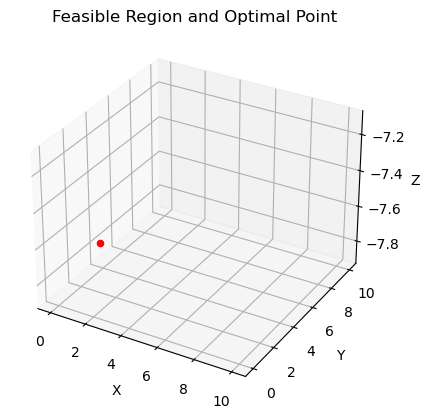

Decision Variables: [2.50000000e+00 4.92394014e-13 5.41666667e+00]
Objective Value: -7.499999999973484


In [9]:
simplex(Objective_Function, constraints, RHS, maximize=True, plot_3d = True)

## Transportation Problem

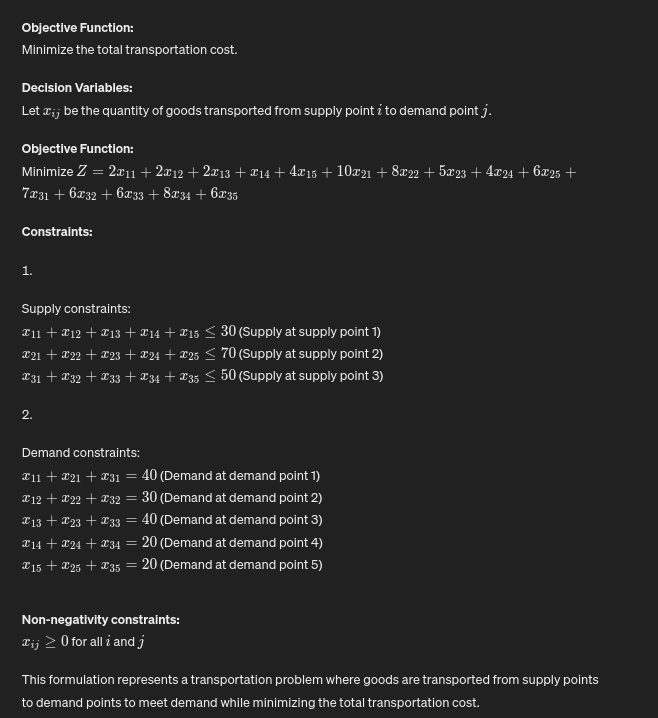

In [10]:
def get_balanced_tp(supply, demand, costs, penalties = None):
    total_supply = sum(supply)
    total_demand = sum(demand)
    
    if total_supply < total_demand:
        if penalties is None:
            raise Exception('Supply less than demand, penalties required')
        new_supply = supply + [total_demand - total_supply]
        new_costs = costs + [penalties]
        return new_supply, demand, new_costs
    if total_supply > total_demand:
        new_demand = demand + [total_supply - total_demand]
        new_costs = costs + [[0 for _ in demand]]
        return supply, new_demand, new_costs
    return supply, demand, costs



def north_west_corner(supply, demand):
    supply_copy = supply.copy()
    demand_copy = demand.copy()
    i = 0
    j = 0
    bfs = []
    while len(bfs) < len(supply) + len(demand) - 1:
        s = supply_copy[i]
        d = demand_copy[j]
        v = min(s, d)
        supply_copy[i] -= v
        demand_copy[j] -= v
        bfs.append(((i, j), v))
        if supply_copy[i] == 0 and i < len(supply) - 1:
            i += 1
        elif demand_copy[j] == 0 and j < len(demand) - 1:
            j += 1
    return bfs


def get_us_and_vs(bfs, costs):
    us = [None] * len(costs)
    vs = [None] * len(costs[0])
    us[0] = 0
    bfs_copy = bfs.copy()
    while len(bfs_copy) > 0:
        for index, bv in enumerate(bfs_copy):
            i, j = bv[0]
            if us[i] is None and vs[j] is None: continue
                
            cost = costs[i][j]
            if us[i] is None:
                us[i] = cost - vs[j]
            else: 
                vs[j] = cost - us[i]
            bfs_copy.pop(index)
            break
            
    return us, vs      

def get_ws(bfs, costs, us, vs):
    ws = []
    for i, row in enumerate(costs):
        for j, cost in enumerate(row):
            non_basic = all([p[0] != i or p[1] != j for p, v in bfs])
            if non_basic:
                ws.append(((i, j), us[i] + vs[j] - cost))
    
    return ws

def can_be_improved(ws):
    for p, v in ws:
        if v > 0: return True
    return False

def get_entering_variable_position(ws):
    ws_copy = ws.copy()
    ws_copy.sort(key=lambda w: w[1])
    return ws_copy[-1][0]

def get_possible_next_nodes(loop, not_visited):
    last_node = loop[-1]
    nodes_in_row = [n for n in not_visited if n[0] == last_node[0]]
    nodes_in_column = [n for n in not_visited if n[1] == last_node[1]]
    if len(loop) < 2:
        return nodes_in_row + nodes_in_column
    else:
        prev_node = loop[-2]
        row_move = prev_node[0] == last_node[0]
        if row_move: return nodes_in_column
        return nodes_in_row

def get_loop(bv_positions, ev_position):
    def inner(loop):
        if len(loop) > 3:
            can_be_closed = len(get_possible_next_nodes(loop, [ev_position])) == 1
            if can_be_closed: return loop
        
        not_visited = list(set(bv_positions) - set(loop))
        possible_next_nodes = get_possible_next_nodes(loop, not_visited)
        for next_node in possible_next_nodes:
            new_loop = inner(loop + [next_node])
            if new_loop: return new_loop
    
    return inner([ev_position])

def loop_pivoting(bfs, loop):
    even_cells = loop[0::2]
    odd_cells = loop[1::2]
    get_bv = lambda pos: next(v for p, v in bfs if p == pos)
    leaving_position = sorted(odd_cells, key=get_bv)[0]
    leaving_value = get_bv(leaving_position)
    
    new_bfs = []
    for p, v in [bv for bv in bfs if bv[0] != leaving_position] + [(loop[0], 0)]:
        if p in even_cells:
            v += leaving_value
        elif p in odd_cells:
            v -= leaving_value
        new_bfs.append((p, v))
        
    return new_bfs

def transportation_simplex_method(supply, demand, costs, penalties = None):
    balanced_supply, balanced_demand, balanced_costs = get_balanced_tp(
        supply, demand, costs
    )
    def inner(bfs):
        us, vs = get_us_and_vs(bfs, balanced_costs)
        ws = get_ws(bfs, balanced_costs, us, vs)
        if can_be_improved(ws):
            ev_position = get_entering_variable_position(ws)
            loop = get_loop([p for p, v in bfs], ev_position)
            return inner(loop_pivoting(bfs, loop))
        return bfs
    
    basic_variables = inner(north_west_corner(balanced_supply, balanced_demand))
    solution = np.zeros((len(costs), len(costs[0])))
    for (i, j), v in basic_variables:
        solution[i][j] = v

    return solution

def get_total_cost(costs, solution):
    total_cost = 0
    for i, row in enumerate(costs):
        for j, cost in enumerate(row):
            total_cost += cost * solution[i][j]
    return total_cost

def transportation(supply, demand, costs, penalties=None):
    solution = transportation_simplex_method(supply, demand, costs, penalties)
    total_cost = get_total_cost(costs, solution)
    print("Optimal Solution:\n")
    print(solution)
    print("\nTotal Cost:", total_cost)
    print("\n")
    fig, ax = plt.subplots()
    im = ax.imshow(costs, cmap='Greys', interpolation='nearest', origin='upper')
    for i in range(solution.shape[0]):
        for j in range(solution.shape[1]):
            if solution[i, j] > 0:
                plt.text(j, i, f'{solution[i, j]}', color='red', ha='center', va='center', fontsize=12)
            else:
                plt.text(j, i, f'{solution[i, j]}', color='blue', ha='center', va='center', fontsize=12)

    for i, supply_value in enumerate(supply):
        plt.text(solution.shape[1], i, f' {supply_value}', color='green', ha='center', va='center', fontsize=12)

    for j, demand_value in enumerate(demand):
        plt.text(j, solution.shape[0], f' {demand_value}', color='orange', ha='center', va='center', fontsize=12)

    plt.xlabel('Consumers')
    plt.ylabel('Suppliers')
    plt.title('Transportation Problem Solution')

    plt.axis('off')

    plt.show()

Optimal Solution:

[[30.  0.  0.  0.  0.]
 [ 0.  0. 40. 20. 10.]
 [10. 30.  0.  0. 10.]]

Total Cost: 710.0




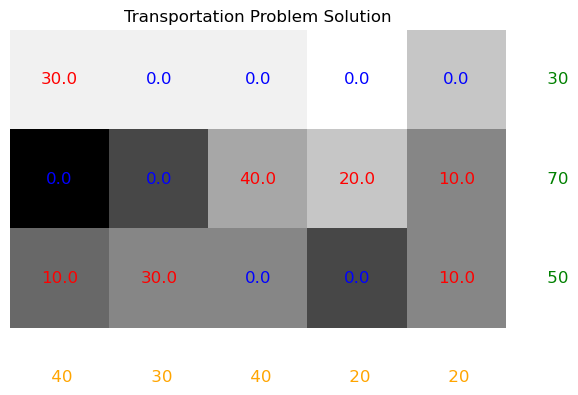

In [11]:
cost_matrix = [
    [2, 2, 2, 1, 4],
    [10, 8, 5, 4, 6],
    [7, 6, 6, 8, 6]
]
supply = [30, 70, 50]
demand = [40, 30, 40, 20, 20]
transportation(supply, demand, cost_matrix)

## Assignment Problem

In [12]:
def assignment_solver(cost_matrix):
    _, assignment = linear_sum_assignment(cost_matrix)
    assignments = np.zeros_like(cost_matrix)
    assignments[np.arange(len(assignment)), assignment] = 1
    total_cost = np.sum(assignments * cost_matrix)

    return assignments, total_cost

def assignment(cost_matrix):
    assignments, total_cost = assignment_solver(cost_matrix)
    print("Optimal Assignments:\n")
    print(assignments)
    print("\nTotal Cost:", total_cost)
    print("\n")
    fig, ax = plt.subplots()
    im = ax.imshow(cost_matrix, cmap='Greys', interpolation='nearest', origin='upper')

    for i in range(assignments.shape[0]):
        for j in range(assignments.shape[1]):
            if assignments[i, j] == 1:
                plt.text(j, i, f'{cost_matrix[i, j]}', color='red', ha='center', va='center', fontsize=12)
            else:
                plt.text(j, i, f'{cost_matrix[i, j]}', color='blue', ha='center', va='center', fontsize=12)

    plt.xlabel('Agents')
    plt.ylabel('Tasks')
    plt.title('Assignment Problem Solution')
    plt.axis('off')
    plt.show()

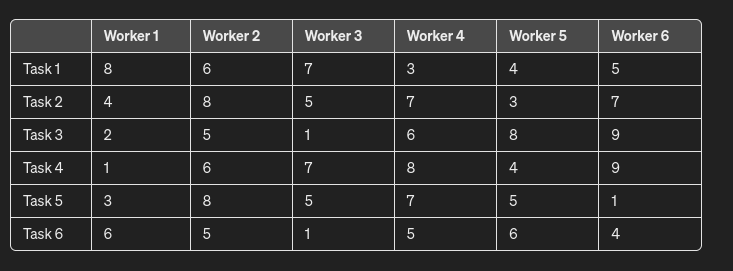

Optimal Assignments:

[[0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]]

Total Cost: 14




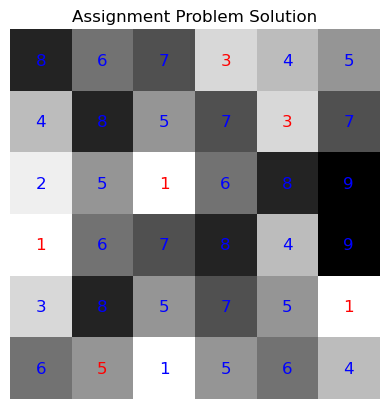

In [13]:
cost_matrix = np.array([
    [8, 6, 7, 3, 4, 5],
    [4, 8, 5, 7, 3, 7],
    [2, 5, 1, 6, 8, 9],
    [1, 6, 7, 8, 4, 9],
    [3, 8, 5, 7, 5, 1],
    [6, 5, 1, 5, 6, 4],  
])
assignment(cost_matrix)
